In [153]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier


In [154]:
# Load dataset
df = pd.read_csv('abalone.csv')

# Periksa kolom yang ada dalam DataFrame
print("Kolom yang ada dalam DataFrame:", df.columns)

# Menampilkan beberapa baris dari dataset
print(df.head())

# Mengubah kolom 'sex' menjadi bentuk angka
# Menggunakan pengkodean label
df['sex'] = df['sex'].map({'M': 0, 'F': 1, 'I': 2})

# Menampilkan beberapa baris setelah pengkodean
print("Setelah pengkodean kolom 'sex':")
print(df.head())

Kolom yang ada dalam DataFrame: Index(['sex', 'length', 'diameter', 'height', 'whole-weight', 'shucked-weight',
       'viscera-weight', 'shell-weight', 'rings'],
      dtype='object')
  sex  length  diameter  height  whole-weight  shucked-weight  viscera-weight  \
0   M      91        73      19         102.8            44.9            20.2   
1   M      70        53      18          45.1            19.9             9.7   
2   F     106        84      27         135.4            51.3            28.3   
3   M      88        73      25         103.2            43.1            22.8   
4   I      66        51      16          41.0            17.9             7.9   

   shell-weight  rings  
0          30.0     15  
1          14.0      7  
2          42.0      9  
3          31.0     10  
4          11.0      7  
Setelah pengkodean kolom 'sex':
   sex  length  diameter  height  whole-weight  shucked-weight  \
0    0      91        73      19         102.8            44.9   
1    0      70

In [155]:
# Membuat variabel baru untuk setiap jenis sex
df['sex_M'] = (df['sex'] == 0).astype(int)  # Mapped to 0
df['sex_F'] = (df['sex'] == 1).astype(int)  # Mapped to 1
df['sex_I'] = (df['sex'] == 2).astype(int)  # Mapped to 2

# Menampilkan beberapa baris setelah penambahan variabel baru
print("Setelah menambahkan variabel baru untuk jenis sex:")
print(df[['sex', 'sex_M', 'sex_F', 'sex_I']].head())

Setelah menambahkan variabel baru untuk jenis sex:
   sex  sex_M  sex_F  sex_I
0    0      1      0      0
1    0      1      0      0
2    1      0      1      0
3    0      1      0      0
4    2      0      0      1


EKSPLORASI DATA

In [156]:
# Memeriksa informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
 9   sex_M           4177 non-null   int64  
 10  sex_F           4177 non-null   int64  
 11  sex_I           4177 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 391.7 KB
None


In [157]:
# Memeriksa statistik deskriptif
print(df.describe())

               sex       length     diameter       height  whole-weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      0.955470   104.798420    81.576251    27.903280    165.748432   
std       0.827815    24.018583    19.847973     8.365411     98.077804   
min       0.000000    15.000000    11.000000     0.000000      0.400000   
25%       0.000000    90.000000    70.000000    23.000000     88.300000   
50%       1.000000   109.000000    85.000000    28.000000    159.900000   
75%       2.000000   123.000000    96.000000    33.000000    230.600000   
max       2.000000   163.000000   130.000000   226.000000    565.100000   

       shucked-weight  viscera-weight  shell-weight        rings        sex_M  \
count     4177.000000     4177.000000   4177.000000  4177.000000  4177.000000   
mean        71.873498       36.118722     47.766172     9.933684     0.365813   
std         44.392590       21.922850     27.840534     3.224169     0.481715   


In [158]:
# Memeriksa nilai yang hilang
print(df.isnull().sum())

sex               0
length            0
diameter          0
height            0
whole-weight      0
shucked-weight    0
viscera-weight    0
shell-weight      0
rings             0
sex_M             0
sex_F             0
sex_I             0
dtype: int64


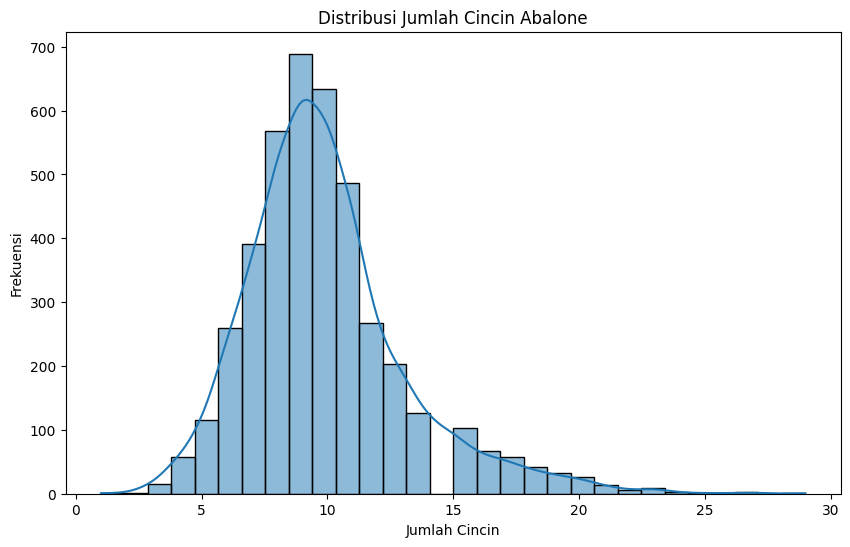

In [159]:
# Visualisasi distribusi target (Rings)
plt.figure(figsize=(10, 6))
sns.histplot(df['rings'], bins=30, kde=True)
plt.title('Distribusi Jumlah Cincin Abalone')
plt.xlabel('Jumlah Cincin')
plt.ylabel('Frekuensi')
plt.show()

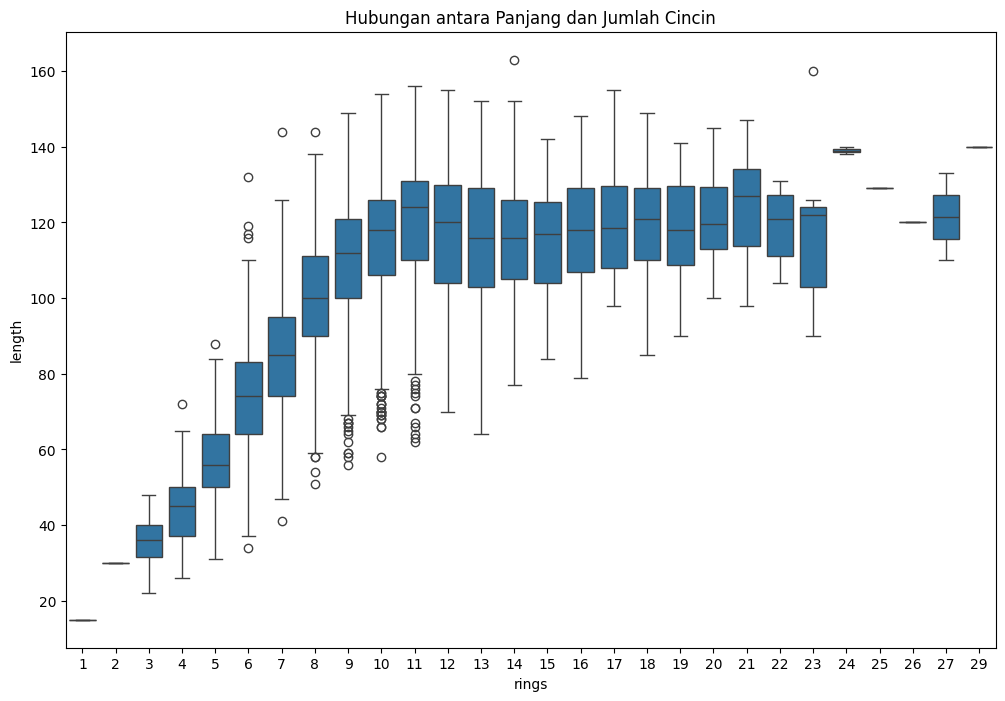

In [160]:
# Visualisasi hubungan antara fitur dan target
plt.figure(figsize=(12, 8))
sns.boxplot(x='rings', y='length', data=df)
plt.title('Hubungan antara Panjang dan Jumlah Cincin')
plt.show()

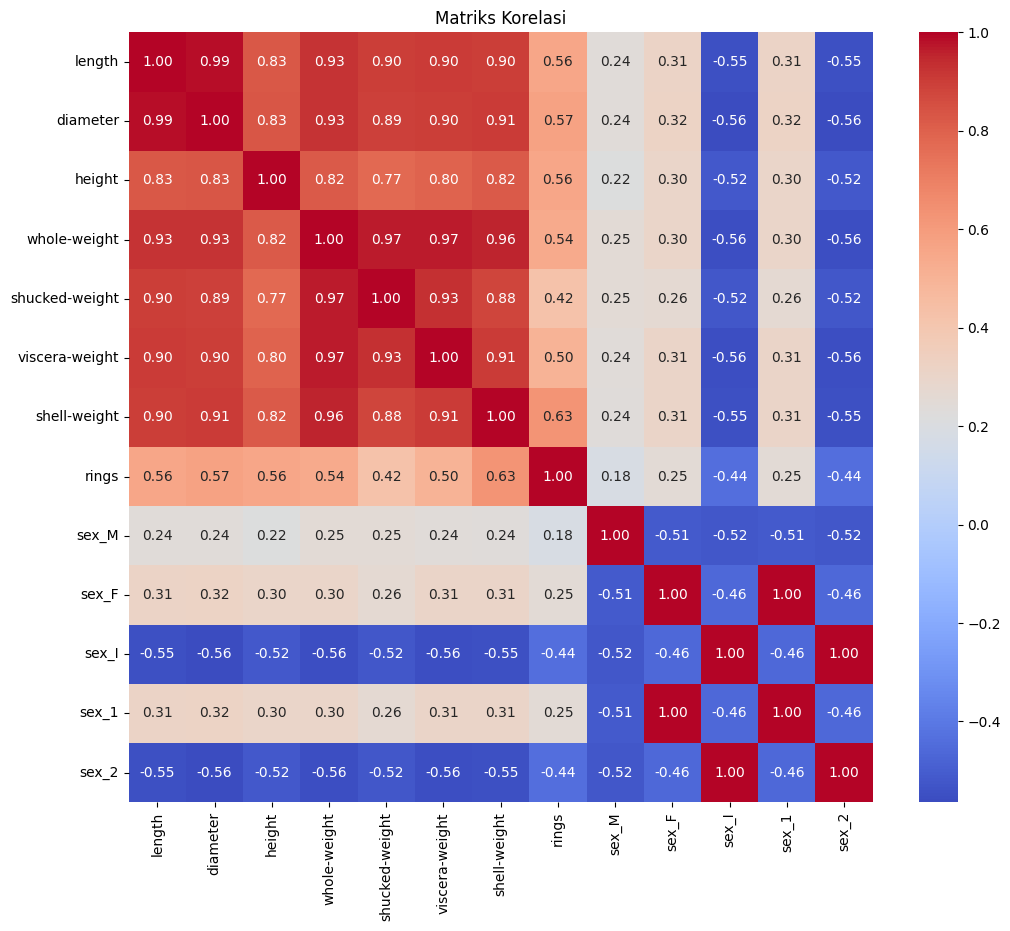

In [161]:
# Mengonversi kolom 'sex' menjadi variabel dummy
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Memeriksa korelasi antara fitur
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [162]:
average_height = df.groupby('height').mean()
print("Rata-rata tinggi:")
print(average_height)

Rata-rata tinggi:
            length    diameter  whole-weight  shucked-weight  viscera-weight  \
height                                                                         
0        74.500000   57.000000     56.200000       26.400000       11.450000   
2        15.000000   11.000000      0.400000        0.200000        0.100000   
3        80.000000   61.000000    117.100000       51.700000       31.100000   
4        32.500000   23.000000      3.700000        1.400000        0.700000   
5        33.000000   23.200000      4.440000        1.540000        1.080000   
6        33.333333   24.333333      4.733333        1.783333        1.166667   
7        30.666667   21.833333      4.016667        1.483333        1.033333   
8        37.230769   27.769231      7.030769        2.884615        1.561538   
9        40.545455   29.818182      8.154545        3.490909        1.981818   
10       44.166667   32.111111     10.950000        4.272222        2.572222   
11       47.920000   3

<Figure size 1200x600 with 0 Axes>

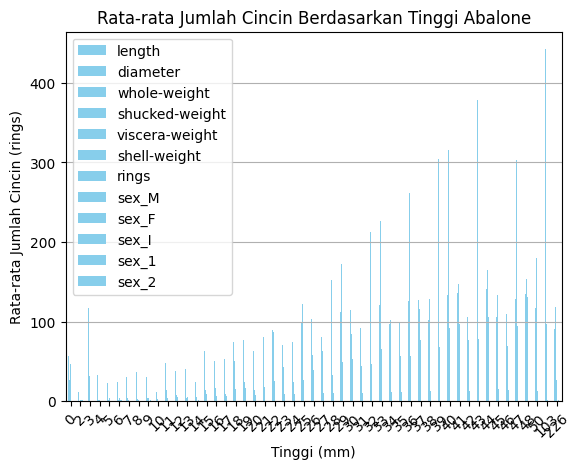

In [163]:
# Membuat visualisasi grafik batang
plt.figure(figsize=(12, 6))
average_height.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Cincin Berdasarkan Tinggi Abalone')
plt.xlabel('Tinggi (mm)')
plt.ylabel('Rata-rata Jumlah Cincin (rings)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

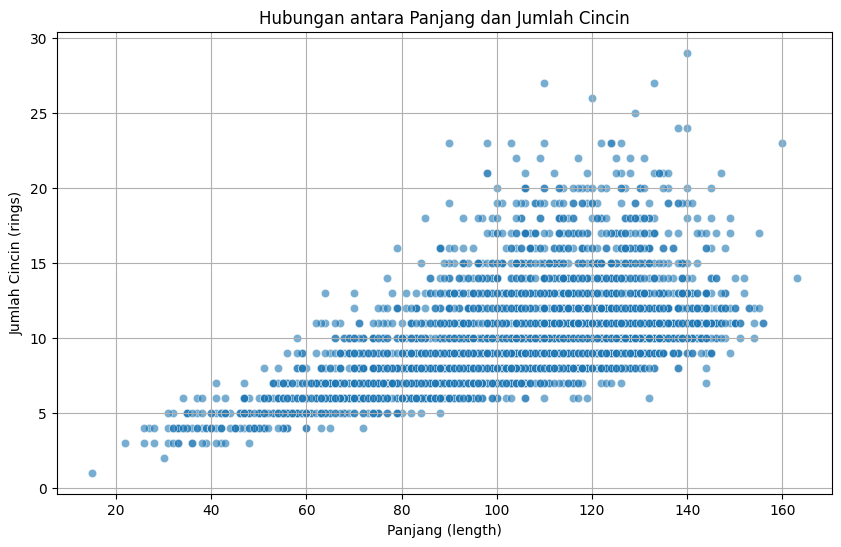

In [164]:
# Visualisasi hubungan antara panjang dan jumlah cincin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length', y='rings', data=df, alpha=0.6)
plt.title('Hubungan antara Panjang dan Jumlah Cincin')
plt.xlabel('Panjang (length)')
plt.ylabel('Jumlah Cincin (rings)')
plt.grid()
plt.show()

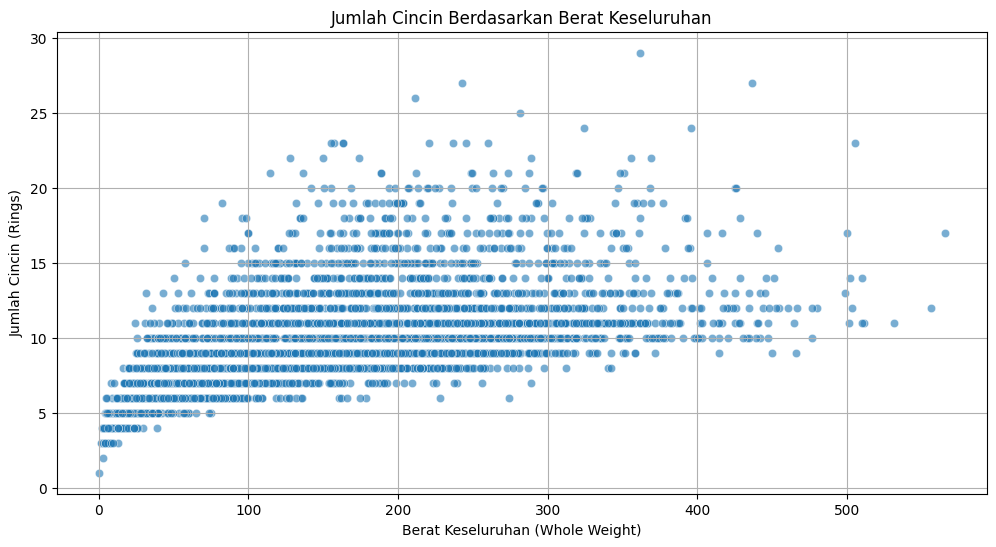

In [165]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='whole-weight', y='rings', data=df, alpha=0.6)
plt.title('Jumlah Cincin Berdasarkan Berat Keseluruhan')
plt.xlabel('Berat Keseluruhan (Whole Weight)')
plt.ylabel('Jumlah Cincin (Rings)')
plt.grid(True)
plt.show()

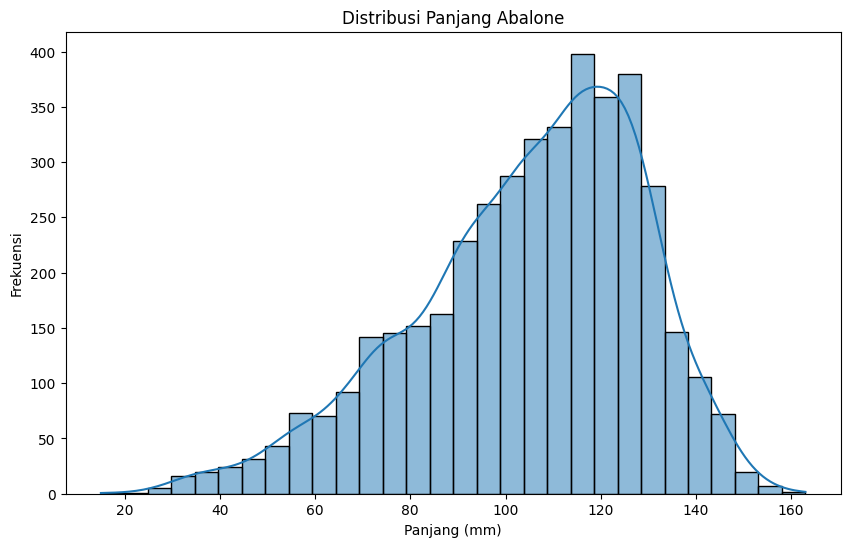

In [166]:
# Memeriksa distribusi panjang abalone
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Distribusi Panjang Abalone')
plt.xlabel('Panjang (mm)')
plt.ylabel('Frekuensi')
plt.show()

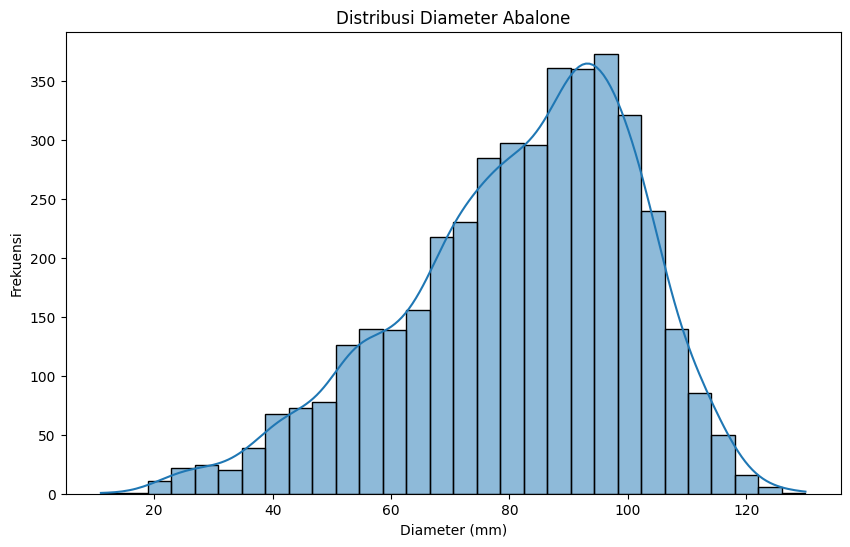

In [167]:
# Memeriksa distribusi diameter abalone
plt.figure(figsize=(10, 6))
sns.histplot(df['diameter'], bins=30, kde=True)
plt.title('Distribusi Diameter Abalone')
plt.xlabel('Diameter (mm)')
plt.ylabel('Frekuensi')
plt.show()

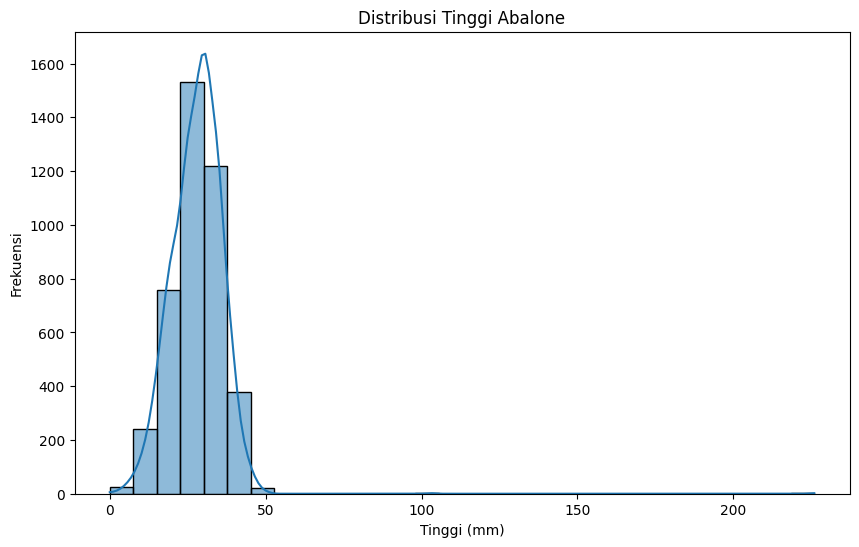

In [168]:
# Memeriksa distribusi tinggi abalone
plt.figure(figsize=(10, 6))
sns.histplot(df['height'], bins=30, kde=True)
plt.title('Distribusi Tinggi Abalone')
plt.xlabel('Tinggi (mm)')
plt.ylabel('Frekuensi')
plt.show()

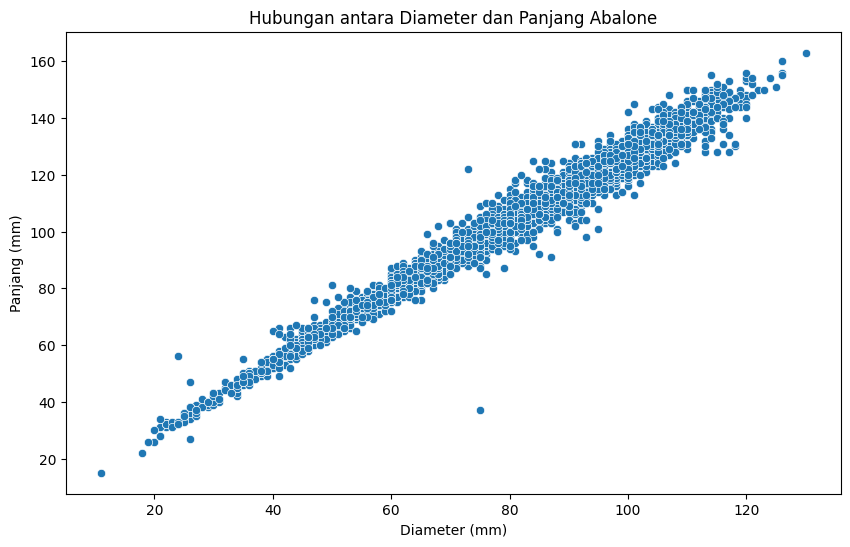

In [169]:
# Memeriksa hubungan antara diameter dan panjang
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diameter', y='length', data=df)
plt.title('Hubungan antara Diameter dan Panjang Abalone')
plt.xlabel('Diameter (mm)')
plt.ylabel('Panjang (mm)')
plt.show()

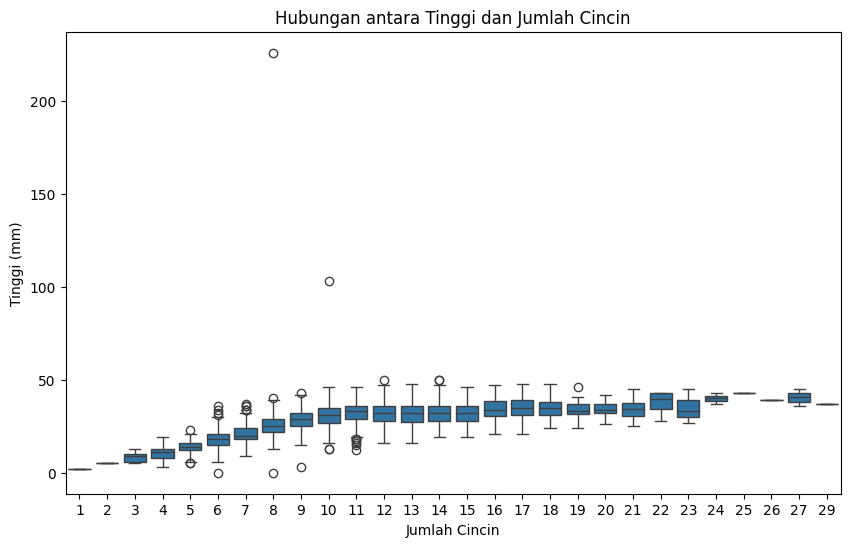

In [170]:
# Memeriksa hubungan antara tinggi dan jumlah cincin
plt.figure(figsize=(10, 6))
sns.boxplot(x='rings', y='height', data=df)
plt.title('Hubungan antara Tinggi dan Jumlah Cincin')
plt.xlabel('Jumlah Cincin')
plt.ylabel('Tinggi (mm)')
plt.show()

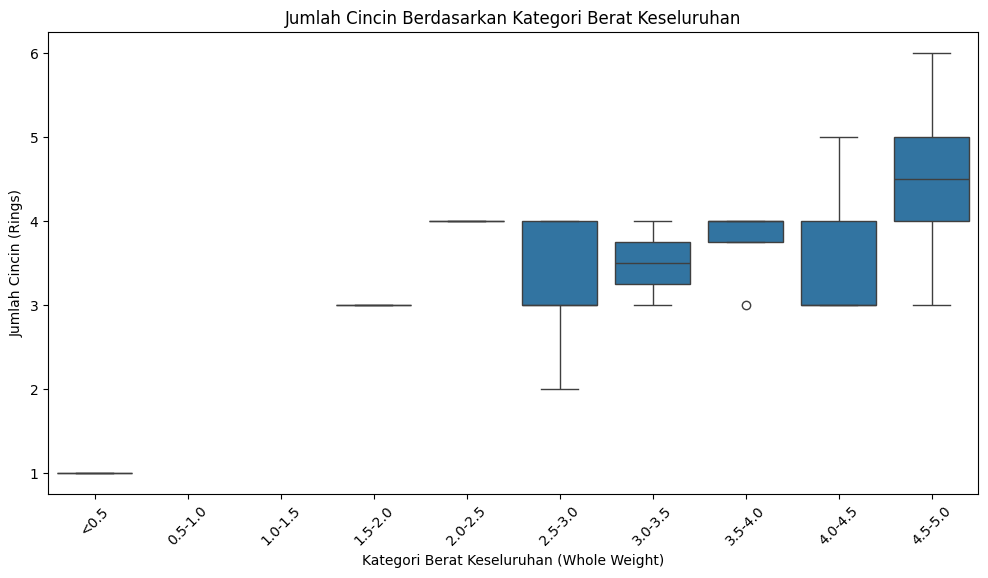

In [171]:
# Membuat kategori berat keseluruhan
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['<0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']
df['weight_category'] = pd.cut(df['whole-weight'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='weight_category', y='rings', data=df)
plt.title('Jumlah Cincin Berdasarkan Kategori Berat Keseluruhan')
plt.xlabel('Kategori Berat Keseluruhan (Whole Weight)')
plt.ylabel('Jumlah Cincin (Rings)')
plt.xticks(rotation=45)
plt.show()

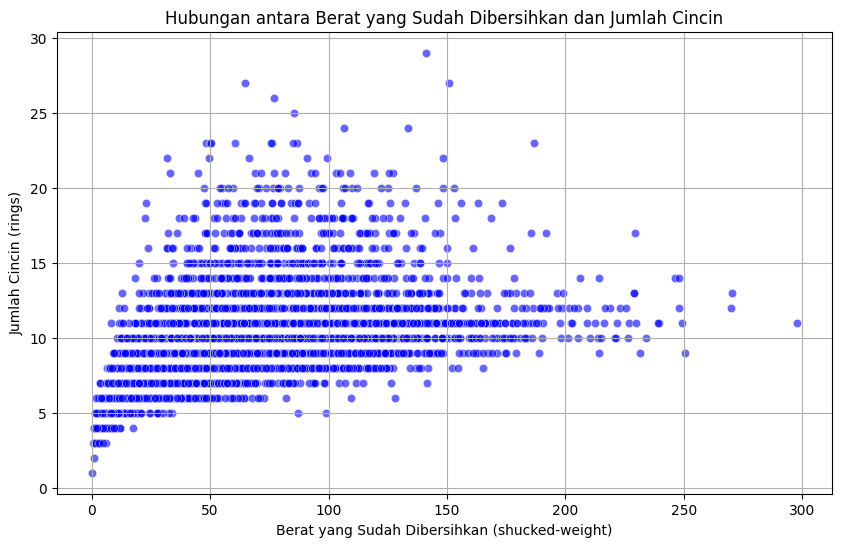

In [172]:
# Visualisasi hubungan antara berat yang sudah dibersihkan dan jumlah cincin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shucked-weight', y='rings', data=df, alpha=0.6, color='blue')
plt.title('Hubungan antara Berat yang Sudah Dibersihkan dan Jumlah Cincin')
plt.xlabel('Berat yang Sudah Dibersihkan (shucked-weight)')
plt.ylabel('Jumlah Cincin (rings)')
plt.grid()
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17832\2629572011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rings', y='whole-weight', data=df, palette='Set2')


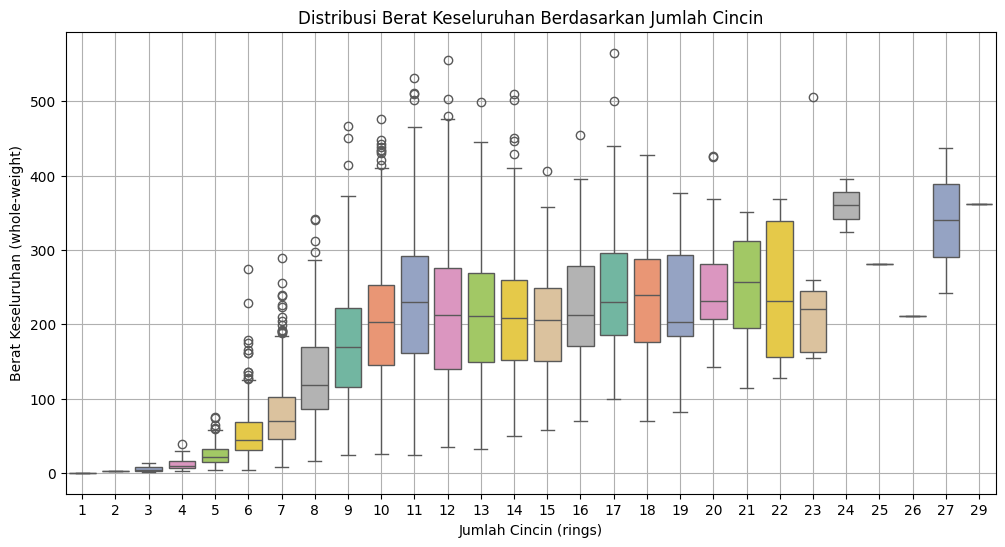

In [173]:
# Visualisasi distribusi berat keseluruhan berdasarkan jumlah cincin
plt.figure(figsize=(12, 6))
sns.boxplot(x='rings', y='whole-weight', data=df, palette='Set2')
plt.title('Distribusi Berat Keseluruhan Berdasarkan Jumlah Cincin')
plt.xlabel('Jumlah Cincin (rings)')
plt.ylabel('Berat Keseluruhan (whole-weight)')
plt.grid()
plt.show()

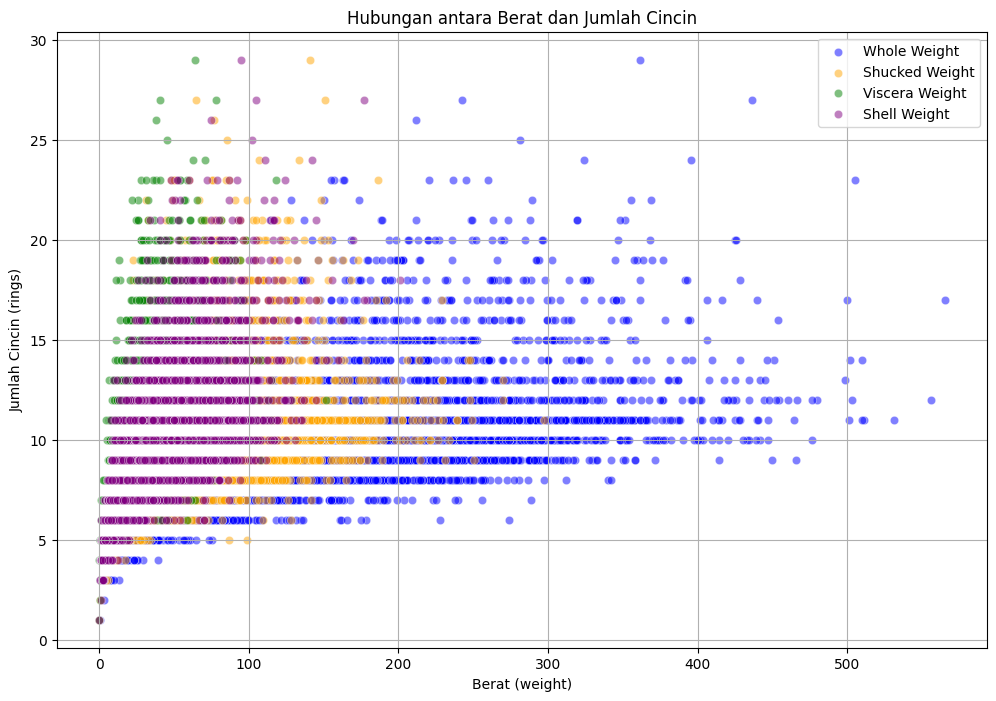

In [174]:
# Visualisasi hubungan antara semua fitur berat dan jumlah cincin
plt.figure(figsize=(12, 8))
sns.scatterplot(x='whole-weight', y='rings', data=df, alpha=0.5, color='blue', label='Whole Weight')
sns.scatterplot(x='shucked-weight', y='rings', data=df, alpha=0.5, color='orange', label='Shucked Weight')
sns.scatterplot(x='viscera-weight', y='rings', data=df, alpha=0.5, color='green', label='Viscera Weight')
sns.scatterplot(x='shell-weight', y='rings', data=df, alpha=0.5, color='purple', label='Shell Weight')
plt.title('Hubungan antara Berat dan Jumlah Cincin')
plt.xlabel('Berat (weight)')
plt.ylabel('Jumlah Cincin (rings)')
plt.legend()
plt.grid()
plt.show()

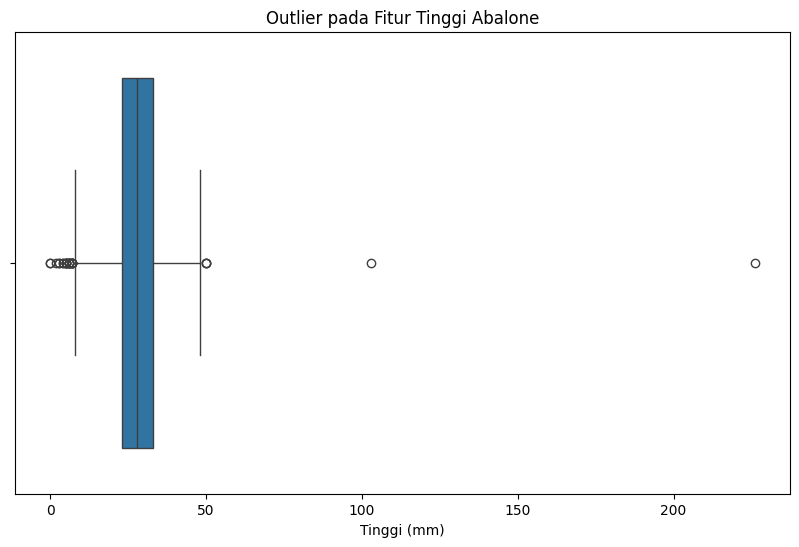

In [175]:
# Memeriksa outlier pada fitur tinggi
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['height'])
plt.title('Outlier pada Fitur Tinggi Abalone')
plt.xlabel('Tinggi (mm)')
plt.show()

PREPROCESSING DATA

Distribusi Kelas:
 shell-weight
low       3213
medium     942
high        22
Name: count, dtype: int64


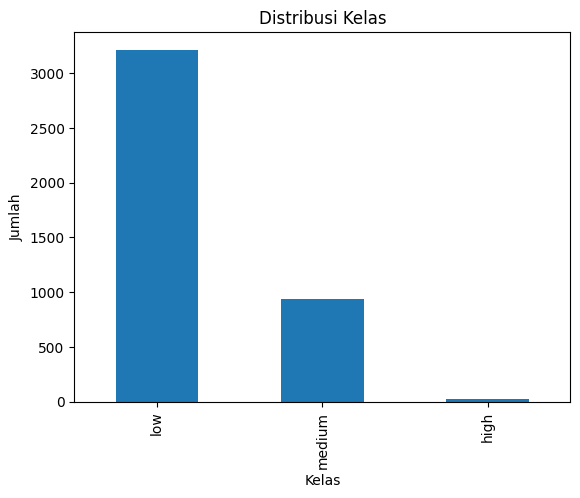

Bentuk Data Latih: (3341, 2), Bentuk Data Uji: (836, 2)


In [176]:
# Memisahkan Fitur dan Target menggunakan variabel baru
X = df[['whole-weight', 'shucked-weight']]
y = df['shell-weight']  # Menggunakan kolom 'shell-weight' sebagai target

# Mengubah target menjadi kategori menggunakan binning
y_binned = pd.cut(y, bins=3, labels=['low', 'medium', 'high'])

# Memeriksa apakah DataFrame X kosong
if X.empty:
    raise ValueError("DataFrame X kosong. Tidak ada data untuk dinormalisasi.")

# Normalisasi atau Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Memeriksa distribusi kelas
class_distribution = y_binned.value_counts()
print("Distribusi Kelas:\n", class_distribution)

# Visualisasi distribusi kelas
class_distribution.plot(kind='bar')
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

# Pembagian Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)

# Menampilkan bentuk data latih dan data uji
print(f'Bentuk Data Latih: {X_train.shape}, Bentuk Data Uji: {X_test.shape}')

PELATIHAN DAN PENGUJIAN MODEL

In [177]:
# Binarisasi target untuk menghitung ROC Curve
y_test_binarized = label_binarize(y_test, classes=['low', 'medium', 'high'])

In [178]:
# Model K-Nearest Neighbors (KNN) untuk Klasifikasi
knn_model = KNeighborsClassifier(n_neighbors=5)  # Menggunakan KNeighborsClassifier
knn_model.fit(X_train, y_train)

# Prediksi dengan KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluasi KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # Akurasi model
cm_knn = confusion_matrix(y_test, y_pred_knn)  # Confusion matrix

# Menampilkan Akurasi dan Laporan Klasifikasi
print(f'KNN Klasifikasi - Akurasi: {accuracy_knn:.2f}')
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn, target_names=['low', 'medium', 'high']))

KNN Klasifikasi - Akurasi: 0.92

Laporan Klasifikasi:
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         3
      medium       0.96      0.95      0.95       646
        high       0.81      0.85      0.83       187

    accuracy                           0.92       836
   macro avg       0.59      0.60      0.59       836
weighted avg       0.92      0.92      0.92       836



Random Forest Klasifikasi - Akurasi: 0.9198564593301436
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.96      0.94      0.95       646
      medium       0.80      0.86      0.83       187

    accuracy                           0.92       836
   macro avg       0.59      0.60      0.59       836
weighted avg       0.92      0.92      0.92       836



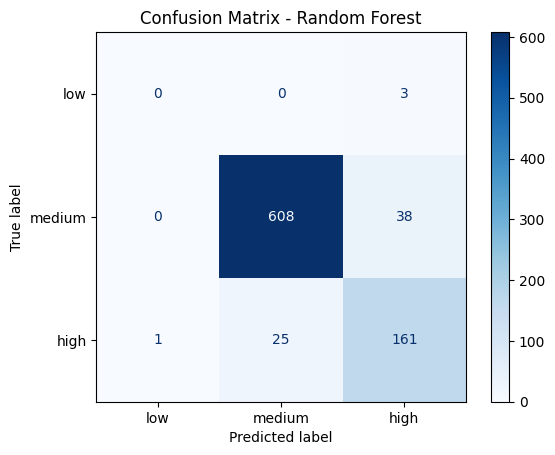

In [179]:
# Model Random Forest untuk Klasifikasi
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# ROC Curve dan AUC untuk Random Forest
rf_probs = rf_model.predict_proba(X_test)
rf_fpr, rf_tpr, _ = roc_curve(y_test_binarized[:, 1], rf_probs[:, 1])  # Menggunakan kelas 'medium'
rf_auc = auc(rf_fpr, rf_tpr)

# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Klasifikasi - Akurasi: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=['low', 'medium', 'high']).plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [180]:
# Model SVM untuk Klasifikasi dengan probability=True
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# ROC Curve dan AUC untuk SVM
svm_probs = svm_model.predict_proba(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test_binarized[:, 1], svm_probs[:, 1])  # Menggunakan kelas 'medium'
svm_auc = auc(svm_fpr, svm_tpr)

# Model SVM untuk Klasifikasi
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi dengan SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluasi SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Klasifikasi - Akurasi: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm))

SVM Klasifikasi - Akurasi: 0.9294258373205742
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.95      0.96      0.96       646
      medium       0.84      0.84      0.84       187

    accuracy                           0.93       836
   macro avg       0.60      0.60      0.60       836
weighted avg       0.93      0.93      0.93       836



c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

INTERPRETASI

Interpretasi KNN:
1. Akurasi Model: 92.22%
2. Confusion Matrix menunjukkan distribusi prediksi yang benar dan salah pada masing-masing kelas.
3. Laporan Klasifikasi menunjukkan nilai precision, recall, dan f1-score untuk setiap kelas, memberikan wawasan tentang kinerja model di setiap kategori.


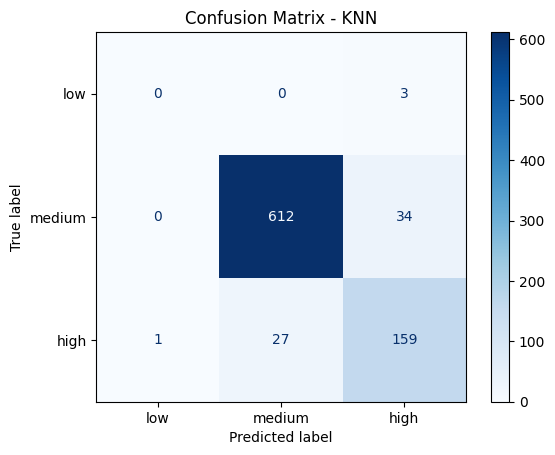

In [181]:
# Interpretasi KNN
print("Interpretasi KNN:")
print("1. Akurasi Model: {:.2f}%".format(accuracy_knn * 100))
print("2. Confusion Matrix menunjukkan distribusi prediksi yang benar dan salah pada masing-masing kelas.")
print("3. Laporan Klasifikasi menunjukkan nilai precision, recall, dan f1-score untuk setiap kelas, memberikan wawasan tentang kinerja model di setiap kategori.")

# Visualisasi Confusion Matrix KNN
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()

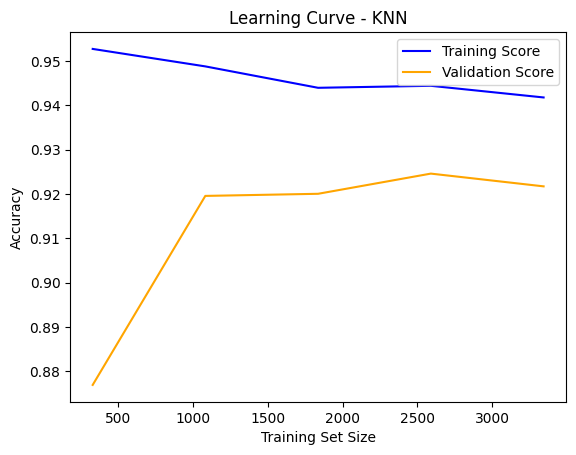

In [182]:
# Learning Curve KNN
train_sizes, train_scores, test_scores = learning_curve(knn_model, X_scaled, y_binned, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.title('Learning Curve - KNN')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Interpretasi Random Forest:
1. Akurasi Model: 91.99%
2. Random Forest seringkali unggul dalam menangani dataset dengan fitur kompleks dan interaksi non-linear.
3. ROC Curve memberikan wawasan tambahan tentang kemampuan model dalam membedakan antar kelas.


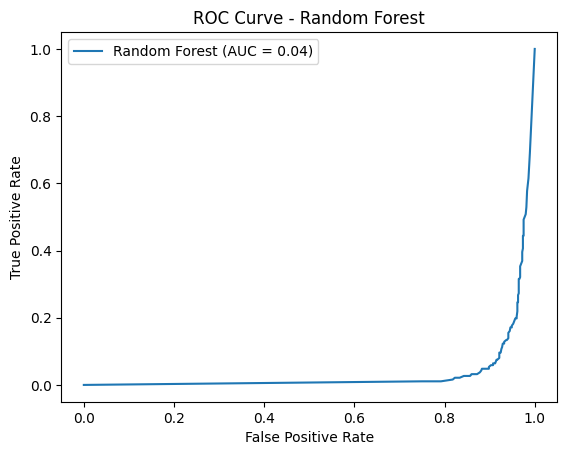

In [183]:
# Interpretasi Random Forest
print("Interpretasi Random Forest:")
print("1. Akurasi Model: {:.2f}%".format(accuracy_rf * 100))
print("2. Random Forest seringkali unggul dalam menangani dataset dengan fitur kompleks dan interaksi non-linear.")
print("3. ROC Curve memberikan wawasan tambahan tentang kemampuan model dalam membedakan antar kelas.")

# Visualisasi ROC Curve Random Forest
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

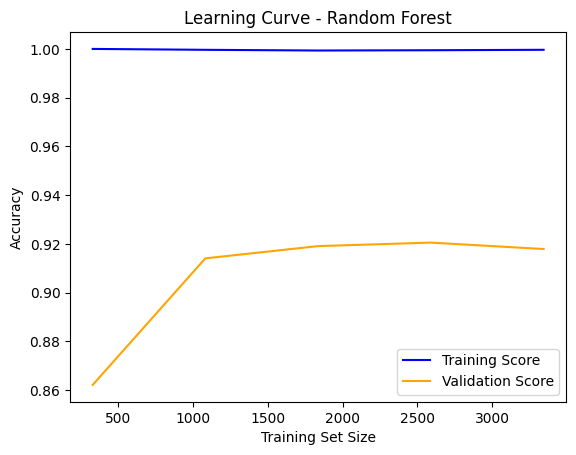

In [184]:
# Learning Curve Random Forest
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_scaled, y_binned, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Interpretasi SVM:
1. Akurasi Model: 92.94%
2. ROC Curve dan AUC memberikan informasi tentang kemampuan model membedakan antara kelas, dengan AUC yang lebih tinggi menunjukkan kinerja yang lebih baik.
3. Laporan Klasifikasi memperlihatkan bagaimana model menangani trade-off antara precision dan recall.


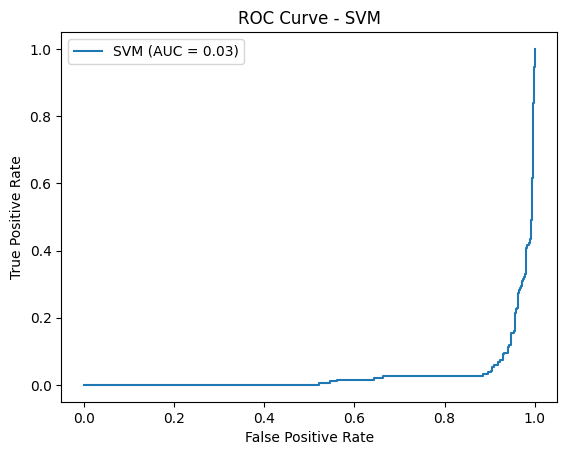

In [185]:
# Interpretasi SVM
print("Interpretasi SVM:")
print("1. Akurasi Model: {:.2f}%".format(accuracy_svm * 100))
print("2. ROC Curve dan AUC memberikan informasi tentang kemampuan model membedakan antara kelas, dengan AUC yang lebih tinggi menunjukkan kinerja yang lebih baik.")
print("3. Laporan Klasifikasi memperlihatkan bagaimana model menangani trade-off antara precision dan recall.")

# Visualisasi ROC Curve SVM
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

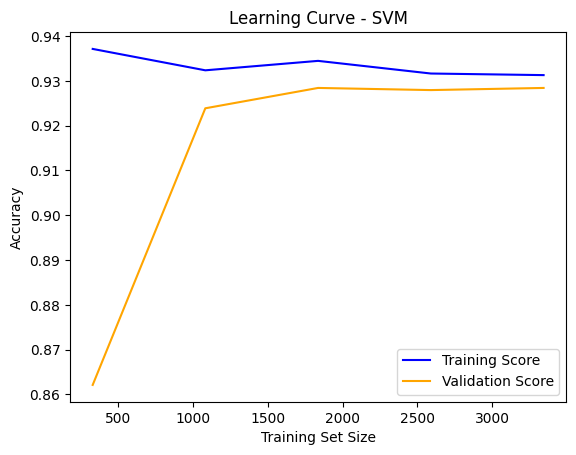

In [186]:
# Learning Curve SVM
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_scaled, y_binned, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.title('Learning Curve - SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()